# Library

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image 

from prml.graphical_models import IteratedConditionalModes

# Iterated Conditional Modes

In [2]:
# This is exactly the same as prml.graphical_models.IteratedConditionalModes

class IteratedConditionalModes():
    def __init__(self,h=1.0,beta=1.0,gamma=1.0,max_iter=100):
        self.h = h 
        self.beta = beta 
        self.gamma = gamma 
        self.max_iter = max_iter 

    def denoise_image(self,image):
        image[image == 0] = -1 
        Y = image 
        X = np.copy(image)
        n1,n2 = X.shape 

        neighbor_factor = np.sum(X[1:]*X[:-1]) + np.sum(X[:,1:]*X[:,:-1])  
        E = self.h*np.sum(X) - self.beta*neighbor_factor - self.gamma*n1*n2 
        for _ in range(self.max_iter):
            changed = 0 
            for i in range(n1):
                for j in range(n2): 
                    idxs = self._get_neighbor_index(i,j,n1,n2) 
                    delta_E = -X[i][j]*2*self.h + X[i][j]*2*self.beta*np.sum(X[idxs]) + 2*self.gamma*Y[i][j]
                    if delta_E < 0: 
                        E += delta_E 
                        changed += 1 
                        X[i][j] *= -1
            
            if changed == 0:
                break 
        
        image[image == -1] = 0
        X[X == -1] = 0
        return X 
    
    def _get_neighbor_index(self,i,j,n1,n2):
        idxs = [] 
        if i+1 < n1 and j+1 < n2:
            idxs.append((i+1,j+1)) 
        if i+1 < n1 and j-1 >= 0:
            idxs.append((i+1,j-1))
        if i-1 >= 0 and j+1 < n2: 
            idxs.append((i-1,j+1)) 
        if i-1 >= 0 and j-1 >= 0:
            idxs.append((i-1,j-1)) 
        return tuple(np.array(idxs).T)

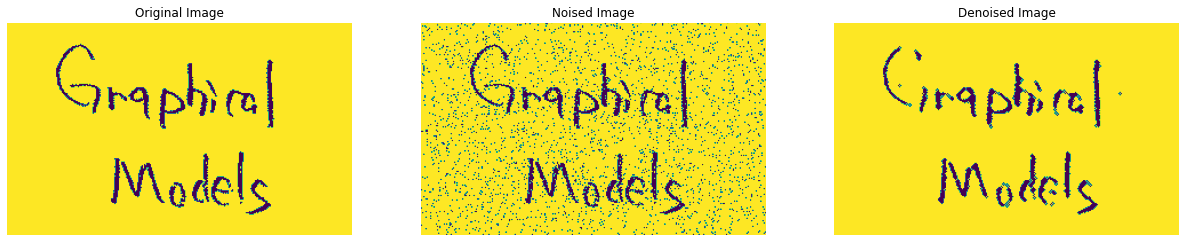

In [3]:
image = Image.open("../data/sample_image.png") 
image = image.convert(mode="1")
image = np.asarray(image)

noise = np.random.binomial(n = 1,p = 0.05,size = image.shape)
noised_image = image^noise 

icm = IteratedConditionalModes(max_iter=10)  
denoised_image = icm.denoise_image(noised_image)

fig,ax = plt.subplots(1,3,figsize=(21,6))
ax[0].imshow(image)
ax[0].axis("off")
ax[0].set_title("Original Image")
ax[1].imshow(noised_image)
ax[1].axis("off")
ax[1].set_title("Noised Image")
ax[2].imshow(denoised_image) 
ax[2].axis("off")
ax[2].set_title("Denoised Image")
plt.show()